In [402]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

In [403]:
irisdata=load_iris(as_frame=True)

In [404]:
irisdata.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [405]:
irisDF=irisdata.frame
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [406]:
# featrue 라벨 인코딩학슴
label=LabelEncoder()
label.fit(irisdata.target_names)

LabelEncoder()

In [407]:
label.__dict__

{'classes_': array(['setosa', 'versicolor', 'virginica'], dtype='<U10')}

In [408]:
irisDF['name']=label.inverse_transform(irisDF['target'])
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


[1] 분류

In [409]:
# 품종 두개 선택
classDF=irisDF[(irisDF['target']==0 )| (irisDF['target']==1)]
classDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor


In [410]:
# 피쳐셋
classfeature=classDF[classDF.columns[:4]]
classfeature

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [411]:
classtarget=classDF['target']
classtarget

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int32

In [412]:
# 학습셋 테스터셋 분리
X_train,X_test,y_train,y_test=train_test_split(classfeature,classtarget,
                                               stratify=classtarget,
                                               random_state=11)

In [413]:
# 스케일링 진행
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [414]:
# 학습진행
model=KNeighborsClassifier()
model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [415]:
# 모델 성능확인
model.score(X_train_scaled,y_train)

1.0

In [416]:
# 테스트 진행
model.score(X_test_scaled,y_test)

1.0

[2] 회귀

In [417]:
regreDF=irisDF[irisDF['target']==2]
regreDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [418]:
regrefeature=regreDF[regreDF.columns[[0,1,3]]]
regrefeature.head()


,sepal length (cm),sepal width (cm),petal width (cm)
100,6.3,3.3,2.5
101,5.8,2.7,1.9
102,7.1,3.0,2.1
103,6.3,2.9,1.8
104,6.5,3.0,2.2


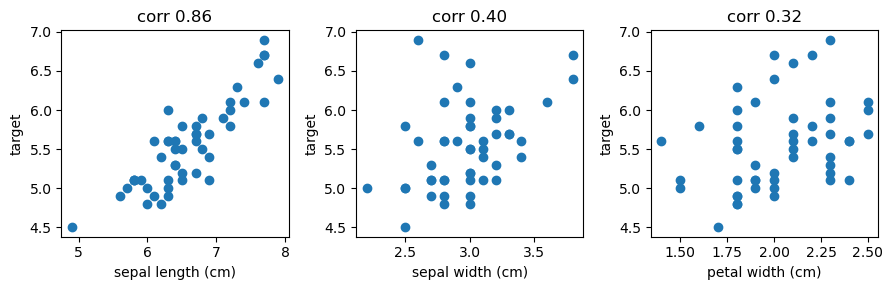

In [419]:
fig,ax=plt.subplots(figsize=(9,3),nrows=1,ncols=3)
for idx,col in enumerate(regrefeature.columns):
    ax[idx].scatter(regrefeature[col],regretarget)
    ax[idx].set_xlabel(f'{col}')
    ax[idx].set_ylabel('target')
    ax[idx].set_title(f'corr {np.corrcoef(regretarget,regrefeature[col])[0,1]:.2f}')
    

plt.tight_layout()
plt.show()

In [420]:
regretarget=regreDF['petal length (cm)']
regretarget.head()

100    6.0
101    5.1
102    5.9
103    5.6
104    5.8
Name: petal length (cm), dtype: float64

In [421]:
# 셋분리
X_train,X_test,y_train,y_test=train_test_split(regrefeature,regretarget,random_state=11)

In [422]:
# 스케일링
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [423]:
# 모델학습
model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [424]:
# 모델 점수 확인
model.score(X_train_scaled,y_train)

0.7278315286393855

In [425]:
# 테스트 점수 확인
model.score(X_test_scaled,y_test)

0.8032207404151415